In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch: 1 / 2, step: 100 / 600, loss: 0.4410
epoch: 1 / 2, step: 200 / 600, loss: 0.4886
epoch: 1 / 2, step: 300 / 600, loss: 0.4354
epoch: 1 / 2, step: 400 / 600, loss: 0.2666
epoch: 1 / 2, step: 500 / 600, loss: 0.1761
epoch: 1 / 2, step: 600 / 600, loss: 0.2772
epoch: 2 / 2, step: 100 / 600, loss: 0.1904
epoch: 2 / 2, step: 200 / 600, loss: 0.2236
epoch: 2 / 2, step: 300 / 600, loss: 0.1671
epoch: 2 / 2, step: 400 / 600, loss: 0.1527
epoch: 2 / 2, step: 500 / 600, loss: 0.1577
epoch: 2 / 2, step: 600 / 600, loss: 0.1488
accuracy = 95.2


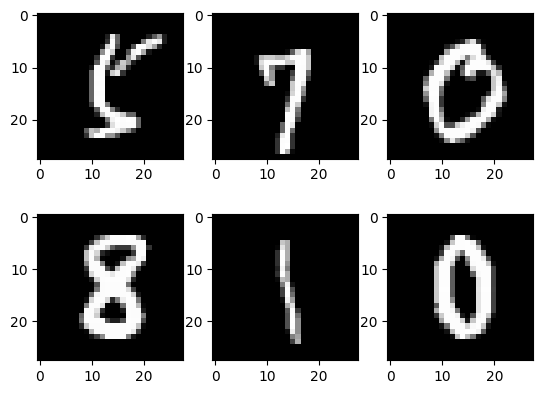

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Menentukan device komputasi:
# - Jika GPU (CUDA) tersedia → gunakan GPU
# - Jika tidak → gunakan CPU

input_size = 784
# Ukuran input = 28 x 28 piksel = 784 (gambar MNIST di-flatten)

hidden_size = 100
# Jumlah neuron pada hidden layer

num_classes = 10
# Jumlah kelas output (digit 0–9)

num_epochs = 2
# Jumlah epoch (berapa kali seluruh dataset dilatih)

batch_size = 100
# Jumlah data per batch

learning_rate = 0.001
# Learning rate untuk optimizer

train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
# Memuat dataset MNIST training
# - transform=ToTensor(): mengubah gambar menjadi tensor [0,1]
# - download=True: unduh jika belum ada

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor()
)
# Memuat dataset MNIST testing

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
# DataLoader untuk training:
# - membagi data menjadi batch
# - shuffle=True agar data diacak setiap epoch

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)
# DataLoader untuk testing (tidak perlu shuffle)

example = iter(train_loader)
# Membuat iterator dari train_loader

samples, labels = next(example)
# Mengambil satu batch contoh (images, labels)

print(samples.shape, labels.shape)
# Menampilkan shape:
# samples → [batch_size, 1, 28, 28]
# labels  → [batch_size]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
# Menampilkan 6 contoh gambar MNIST dari satu batch

# plt.show()
# (dikomentari, jika ingin tampilkan plot, buka komentar)

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        # Memanggil constructor parent (nn.Module)

        self.l1 = nn.Linear(input_size, hidden_size)
        # Layer linear pertama: input → hidden

        self.relu = nn.ReLU()
        # Fungsi aktivasi ReLU

        self.l2 = nn.Linear(hidden_size, num_classes)
        # Layer output: hidden → jumlah kelas

    def forward(self, x):
        out = self.l1(x)
        # Operasi linear pertama

        out = self.relu(out)
        # Aktivasi ReLU

        out = self.l2(out)
        # Layer output (menghasilkan logits)

        return out
        # Return logits (belum softmax)

model = NeuralNet(input_size, hidden_size, num_classes)
# Membuat instance model neural network

learning_rate = 0.001
# Learning rate (didefinisikan ulang, nilainya sama)

criterion = nn.CrossEntropyLoss()
# Loss function:
# CrossEntropyLoss = LogSoftmax + NLLLoss
# Cocok untuk klasifikasi multi-class

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# Optimizer Adam untuk update bobot

n_total_steps = len(train_loader)
# Jumlah batch dalam satu epoch

for epoch in range(num_epochs):
    # Loop epoch
    for i, (images, labels) in enumerate(train_loader):
        # Loop batch per epoch

        images = images.reshape(-1, 28*28).to(device)
        # Flatten gambar dari [batch,1,28,28] → [batch,784]
        # Pindahkan ke device (CPU/GPU)

        labels = labels.to(device)
        # Pindahkan label ke device

        outputs = model(images)
        # Forward pass: hitung logits

        loss = criterion(outputs, labels)
        # Hitung loss antara prediksi dan label asli

        optimizer.zero_grad()
        # Reset gradien agar tidak terakumulasi

        loss.backward()
        # Backpropagation: hitung gradien

        optimizer.step()
        # Update bobot model

        if (i+1) % 100 == 0:
            # Print log setiap 100 batch
            print(f'epoch: {epoch+1} / {num_epochs}, step: {i+1} / {n_total_steps}, loss: {loss.item():.4f}')

with torch.no_grad():
    # Menonaktifkan perhitungan gradien (mode evaluasi)
    n_correct = 0
    n_samples = 0

    for images, labels in test_loader:
        # Loop data testing

        images = images.reshape(-1, 28*28).to(device)
        # Flatten gambar

        labels = labels.to(device)
        # Pindahkan label ke device

        outputs = model(images)
        # Forward pass (prediksi)

        _, predicted = torch.max(outputs.data, 1)
        # Ambil indeks kelas dengan nilai logit tertinggi

        n_samples += labels.shape[0]
        # Tambah jumlah sampel

        n_correct += (predicted == labels).sum().item()
        # Hitung jumlah prediksi yang benar

    acc = 100.0 * n_correct / n_samples
    # Hitung akurasi dalam persen

    print(f'accuracy = {acc}')
    # Tampilkan akurasi akhir pada data test

# =========================
# RINGKASAN:
# Kode ini membangun dan melatih neural network sederhana (1 hidden layer)
# untuk klasifikasi digit MNIST (0–9).
# Alur utama:
# 1) Load & preprocessing dataset MNIST
# 2) Visualisasi contoh data
# 3) Definisi model neural network
# 4) Training per batch dan per epoch
# 5) Evaluasi akurasi pada data test
# Model menghasilkan logits dan menggunakan CrossEntropyLoss
# untuk klasifikasi multi-kelas.
# =========================

"""
RINGKASAN KOMPONEN NEURAL NETWORK

1. INPUT LAYER
   - Jumlah neuron = jumlah fitur (ditentukan dataset).
   - Contoh: MNIST (28x28) = 784 neuron input.
   - Bukan parameter bebas.

2. HIDDEN LAYER & NEURON
   - Tempat model belajar representasi/pola.
   - Merupakan Hyperparameter (ditentukan perancang model).
   - Terlalu sedikit = Underfitting; Terlalu banyak = Overfitting.

3. OUTPUT LAYER
   - Jumlah neuron = jumlah kelas/task.
   - Binary Classification: 1 neuron (Sigmoid).
   - Multi-class Classification: N neuron (Logits / Softmax).

4. LINEAR LAYER (nn.Linear)
   - Operasi Matematika: y = w · x + b (Weight & Bias).
   - Fully Connected: Setiap neuron terhubung ke semua neuron di layer sebelumnya.
   - Sifat: Hanya melakukan transformasi linear (garis lurus).

5. ACTIVATION FUNCTION (ReLU, Sigmoid, Tanh, dll)
   - Bukan merupakan neuron, melainkan fungsi matematika.
   - Memberikan sifat NON-LINEARITAS (memungkinkan model belajar pola rumit).
   - Tanpa activation, jaringan hanya akan menjadi model linear sederhana.

6. ReLU (Rectified Linear Unit)
   - Umumnya digunakan pada Hidden Layer.
   - Fungsi: Mengaktifkan nilai positif (x) dan mematikan nilai negatif (0).
   - Tidak memiliki parameter: Bisa digunakan berulang kali di berbagai layer.

7. URUTAN UMUM LAYER
   - Pola: Linear -> Activation -> Linear -> Activation -> ... -> Output.
   - Struktur ini diulang-ulang sesuai dengan jumlah hidden layer yang diinginkan.
"""